# **Gaussian Process**

Once we have our dataset, we would like to set up a GP for regression

At first we set up our kernel. In this case we choose a standard Gaussian kernel, a.k.a. RBF kernel:
$$K(\mathbf{x}, \mathbf{y}) : = \phi \exp \left\{ - \frac{||\mathbf{x} - \mathbf{y}||_2^2}{2 l^2} \right\}$$

Moreover, we have to choose the value of the variance $\sigma^2$ of the noise of the data we are considering. Selecting the parameters for the kernel is a model selection problem!

In [1]:
import numpy as np
from scipy.stats import zscore
from sklearn import datasets

dataset = datasets.load_iris()

x = zscore(dataset.data[:, 2]).reshape(-1, 1) # column 2 of data is petal length
y = zscore(dataset.data[:, 3]) # column 3 of data is petal width

Changing the values of the kernel parameters influences the dynamic of the GP
For instance if:
- set $l = 8$ we increase the smoothness of the GP
- set $\sigma^2 = 10$ we increase the noise in each point
- set $\phi = 100$ we increase the influence of the kernel to the results


In principle, one should optimize these parameters before starting the regression procedure. We can use either an independent dataset or cross-validation to estimate them, maximizing the likelihood of the considered samples.

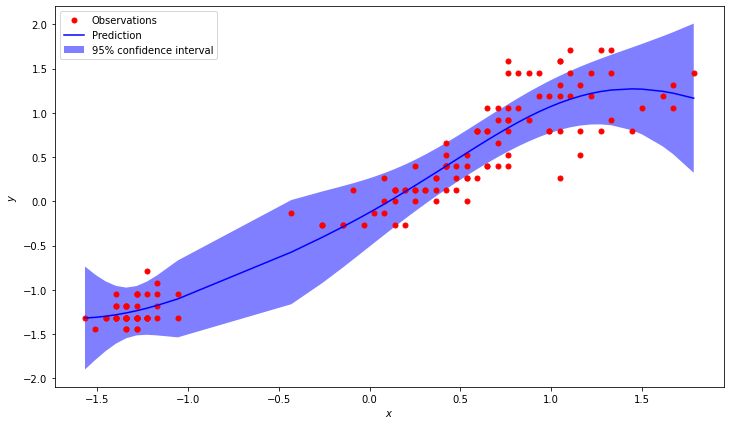

In [10]:
from sklearn.gaussian_process import GaussianProcessRegressor
from matplotlib import pyplot as plt
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

#Kernel values
phi = 3
l = 1
sigma_sq = 1
kernel = ConstantKernel(phi, constant_value_bounds="fixed") * RBF(l, length_scale_bounds="fixed")
gpr = GaussianProcessRegressor(kernel=kernel, alpha=sigma_sq).fit(x, y)
x_pred = np.array(x)
x_pred = np.sort(x_pred, axis=0)
y_pred, sigma = gpr.predict(x_pred, return_std=True)
plt.figure(figsize=(12,7))
plt.plot(x, y, 'r.', markersize=10, label='Observations')
plt.plot(x_pred, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x_pred, x_pred[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='upper left')